<a href="https://colab.research.google.com/github/ajitpatel28/Machinelearning/blob/main/Image_Classification_using_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%cd /content/drive/MyDrive/Kaggle

/content/drive/MyDrive/Kaggle


In [2]:
ls

covid/                         COVID-19_Radiography_Dataset.zip  split/
COVID-19_Radiography_Dataset/  covid_classification.h5


In [ ]:
!unzip COVID-19_Radiography_Dataset.zip

Streaming output truncated to the last 5000 lines.
  inflating: COVID-19_Radiography_Dataset/Normal/masks/Normal-7924.png  
  inflating: COVID-19_Radiography_Dataset/Normal/masks/Normal-7925.png  
  inflating: COVID-19_Radiography_Dataset/Normal/masks/Normal-7926.png  
  inflating: COVID-19_Radiography_Dataset/Normal/masks/Normal-7927.png  
  inflating: COVID-19_Radiography_Dataset/Normal/masks/Normal-7928.png  
  inflating: COVID-19_Radiography_Dataset/Normal/masks/Normal-7929.png  
  inflating: COVID-19_Radiography_Dataset/Normal/masks/Normal-793.png  
  inflating: COVID-19_Radiography_Dataset/Normal/masks/Normal-7930.png  
  inflating: COVID-19_Radiography_Dataset/Normal/masks/Normal-7931.png  
  inflating: COVID-19_Radiography_Dataset/Normal/masks/Normal-7932.png  
  inflating: COVID-19_Radiography_Dataset/Normal/masks/Normal-7933.png  
  inflating: COVID-19_Radiography_Dataset/Normal/masks/Normal-7934.png  
  inflating: COVID-19_Radiography_Dataset/Normal/masks/Normal-7935.png  
 

In [3]:
!pip install split_folders

In [4]:
import splitfolders
splitfolders.ratio("/content/drive/MyDrive/Kaggle/COVID-19_Radiography_Dataset/COVID", output="split", seed=1337, ratio=(.8, .1, .1), group_prefix=None)

KeyboardInterrupt: ignored

In [5]:
from keras.preprocessing.image import ImageDataGenerator

# Normalize training and validation data in the range of 0 to 1
train_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Read the training sample and set the batch size 
train_generator = train_datagen.flow_from_directory(
        'split/train/',
        target_size=(128, 128),
        batch_size=8,
        seed=100,
        class_mode='categorical')

# Read Validation data from directory and define target size with batch size
validation_generator = validation_datagen.flow_from_directory(
        'split/val/',
        target_size=(128, 128),
        batch_size=8,
        class_mode='categorical',
        seed=1000,
        shuffle=False)

test_generator = test_datagen.flow_from_directory(
        'split/test/',
        target_size=(128, 128),
        batch_size=8,
        seed=500,
        class_mode='categorical',
        shuffle=False)

Found 5373 images belonging to 2 classes.
Found 671 images belonging to 2 classes.
Found 674 images belonging to 2 classes.


In [9]:
from tensorflow import keras
from tensorflow.keras import layers
inputs = keras.Input(shape=(128, 128,3))
x = layers.Flatten()(inputs)
x = layers.Dense(32, activation="relu")(x)
x = layers.Dense(64, activation='relu')(x)
outputs = layers.Dense(2, activation="softmax")(x)
model = keras.Model(inputs, outputs)
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 flatten_1 (Flatten)         (None, 49152)             0         
                                                                 
 dense_3 (Dense)             (None, 32)                1572896   
                                                                 
 dense_4 (Dense)             (None, 64)                2112      
                                                                 
 dense_5 (Dense)             (None, 2)                 130       
                                                                 
Total params: 1,575,138
Trainable params: 1,575,138
Non-trainable params: 0
_________________________________________________________________


In [7]:
! pip install tensorflow

     |████████████████████████████████| 462 kB 4.9 MB/s 


In [10]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import Model

adam = Adam(learning_rate=0.0001)
# We are going to use accuracy metrics and cross entropy loss as performance parameters
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# Train the model 
history = model.fit(train_generator, 
      steps_per_epoch=train_generator.samples/train_generator.batch_size,
      epochs=100,
      validation_data=validation_generator,
      validation_steps=validation_generator.samples/validation_generator.batch_size,
      verbose=1)

Epoch 1/100
671/671 [==============================] - 701s 1s/step - loss: 0.1180 - accuracy: 0.9922 - val_loss: 0.0672 - val_accuracy: 0.9851
Epoch 2/100
671/671 [==============================] - 35s 52ms/step - loss: 0.0120 - accuracy: 0.9983 - val_loss: 0.0084 - val_accuracy: 0.9970
Epoch 3/100
671/671 [==============================] - 34s 51ms/step - loss: 0.0092 - accuracy: 0.9983 - val_loss: 0.0013 - val_accuracy: 0.9985
Epoch 4/100
671/671 [==============================] - 34s 51ms/step - loss: 0.0012 - accuracy: 0.9993 - val_loss: 0.0012 - val_accuracy: 0.9985
Epoch 5/100
671/671 [==============================] - 35s 52ms/step - loss: 0.0034 - accuracy: 0.9987 - val_loss: 0.0020 - val_accuracy: 0.9985
Epoch 6/100
671/671 [==============================] - 35s 52ms/step - loss: 0.0198 - accuracy: 0.9961 - val_loss: 0.0021 - val_accuracy: 0.9985
Epoch 7/100
671/671 [==============================] - 35s 52ms/step - loss: 0.0023 - accuracy: 0.9996 - val_loss: 5.2485e-04 - val

In [11]:
model.save('covid_classification.h5')

In [12]:
from tensorflow.keras import models
model = models.load_model('covid_classification.h5')

In [13]:
model.save_weights('covid_classification_weights.h5')

In [14]:
model.load_weights('covid_classification_weights.h5')

In [17]:
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
train_loss = history.history['loss']
val_loss = history.history['val_loss']

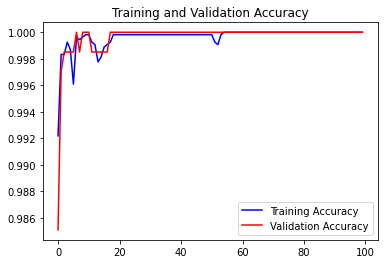

<Figure size 432x288 with 0 Axes>

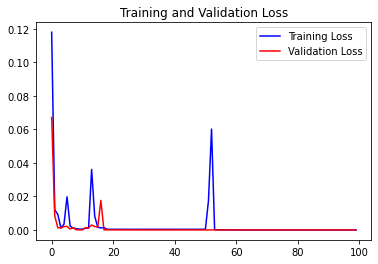

In [18]:
import matplotlib.pyplot as plt
epochs = range(len(train_acc)) 
plt.plot(epochs, train_acc, 'b', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.figure()
plt.show()

plt.plot(epochs, train_loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()


In [19]:
test_output= model.evaluate(test_generator, steps=test_generator.samples/test_generator.batch_size, verbose=1)
print(test_output)
print(model.metrics_names)

84/84 [==============================] - 122s 1s/step - loss: 0.3015 - accuracy: 0.9985
[0.30152761936187744, 0.998516321182251]
['loss', 'accuracy']
